# Let's catch UFO

1. Key things to include: Project Overview #Stakeholder & Business QUESTIONS #Data Soucres #Links to notebooks, preentations, and dashboards

2. Additional Notes Business Problem: A clear statement of the business problem you are solving.

3. Dataset Information: A description of your dataset(s) and how you plan to use it.

4. Methods: Brief explanation of your analysis steps.

5. Results and Recommendations: What insights and recommendations are you providing to the stakeholder?

6. Links: Include links to the Jupyter notebook, dashboard, and presentation files.

Remember no code just visuals non techical

Example Template:

Project Title

Overview A concise summary of the project, including the purpose, the problem it addresses, and the key findings.
Goal of the project: Clearly state the objective. Context: Brief background or motivation for the project. Main results/insights: Summarize key outcomes or insights from your analysis.

Repository Structure (Probably should go at the bottom Provide an outline of the repository, explaining what each folder and file contains. 📁 /data # Contains raw and cleaned datasets 📁 /notebooks # Jupyter Notebooks or code scripts used in analysis 📁 /scripts # Python or other scripts for data cleaning and modeling 📁 /images # Graphs, figures, Tableau dashboard files 📄 README.md # Documentation of the project 📄 requirements.txt # Packages and dependencies needed to run the code 📄 presentation.pdf # Final presentation slides
/data: A brief description of the datasets used, including sources. /notebooks: Notebooks detailing data exploration, cleaning, analysis, and modeling. /scripts: Python scripts for automating tasks like data processing. /images: Contains final visuals, plots, or links to Tableau dashboards.

Data Science Steps Outline the key steps taken during the project:
Data Collection: How data was sourced (e.g., APIs, web scraping, public datasets). Data Cleaning: Techniques used for cleaning and preprocessing data (e.g., handling missing values). Exploratory Data Analysis (EDA): Summary of insights found during the EDA phase. Modeling: Brief overview of the models used and their performance. Results: Main findings from the analysis or predictive models.

Instructions for Use Guide users on how to navigate the repository, including how to replicate the project on their local machine: (git clone link)

Tableau Dashboard Include a link to the Tableau dashboard:

Tableau Dashboard
6. Presentation Provide a link to the final project presentation:

Sources
List any references or external data sources used: Data Source 1(Kaggle)

Commit History Provide an overview of the commit history to demonstrate project development and collaboration. Link to the repository’s commit history for detailed tracking:
View commit history


1. Stakeholder Questions:
- What regions and times have the highest frequency of UFO sightings?
- Are there notable patterns in UFO shapes, descriptions, or lengths of encounters?
- Can any correlations be drawn between the timing (season, time of day) and the likelihood of a sighting?
((- Is there a potential for identifying anomalies or "false positives" in the sighting reports?))

**To be specific, 
- For Tourism Agencies: Which regions and times of year are best for promoting "UFO tourism" based on sighting frequency and reported experiences?
- For Travel Companies: What type of UFO-related experiences (e.g., skywatching tours, themed hotels, local storytelling) can be packaged to attract different demographics?
- For Local Communities: How can areas with high sighting rates leverage their unique status to foster tourism, including infrastructure and marketing for potential visitors?
2. Business Problem: Provide clear and engaging data visualizations that help stakeholders (researchers, enthusiasts, or possibly governmental entities) understand trends in UFO sightings, aiding decision-making for further research or public communication.

# Data Overview


1. Dataset Overview: 
- This dataset contains comprehensive information on UFO sightings, including dates, locations, descriptions, and length of encounters. Using this data, regions with high UFO activity can be identified, and patterns related to seasonality, time of day, and descriptions can be analyzed for their tourism potential.

2. Planned Usage:
- Location-Based Analysis: Identify geographic clusters that could serve as prime locations for UFO-themed tourism, like guided tours, themed restaurants, or local "alien-themed" festivals.
- Temporal Trends: Determine optimal times for UFO sighting-themed events based on historical sighting patterns (e.g., a peak season for sightings).
- Descriptive Insights: Analyze descriptions to craft narratives and stories that can enhance visitor experiences (e.g., famous local sightings, “most likely” shapes or UFO characteristics).

In [2]:
#Import
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
df = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Phase-1-Project/data/ufo_data/ufo-sightings-transformed.csv', index_col='Unnamed: 0')


In [5]:
df.head(5)

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80313 entries, 0 to 80327
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    80313 non-null  object 
 1   date_documented              80313 non-null  object 
 2   Year                         80313 non-null  int64  
 3   Month                        80313 non-null  int64  
 4   Hour                         80313 non-null  int64  
 5   Season                       80313 non-null  object 
 6   Country_Code                 80055 non-null  object 
 7   Country                      80055 non-null  object 
 8   Region                       79748 non-null  object 
 9   Locale                       79857 non-null  object 
 10  latitude                     80313 non-null  float64
 11  longitude                    80313 non-null  float64
 12  UFO_shape                    78390 non-null  object 
 13  length_of_encounter_s

In [7]:
df.isnull().sum()

Date_time                         0
date_documented                   0
Year                              0
Month                             0
Hour                              0
Season                            0
Country_Code                    258
Country                         258
Region                          565
Locale                          456
latitude                          0
longitude                         0
UFO_shape                      1923
length_of_encounter_seconds       0
Encounter_Duration                0
Description                       0
dtype: int64

# Data Cleaning

**Time Standardization**

In [8]:
#Standardize Dates and Times
#Convert Date_time to datetime format
df['Date_time'] = pd.to_datetime(df['Date_time'], errors='coerce')
df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [18]:
#Standardize the date_documented column
df['date_documented'] = pd.to_datetime(df['date_documented'], errors='coerce')
df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,2004-04-27,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,2005-12-16,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,2008-01-21,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,2004-01-17,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,2004-01-22,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [9]:
#Standardize Year, Month, Hour and Season Column 
#Year, Month, and Hour : are they derived accurately from Date_time?
#Season: grouping months into seasons
df['Year'] = df['Date_time'].dt.year
df['Month'] = df['Date_time'].dt.month
df['Hour'] = df['Date_time'].dt.hour

#Seasons
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Autumn')

df.head()

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [10]:
#Standardize the length of encounter seconds column
# Convert 'length_of_encounter_seconds' to numeric, forcing errors to NaN
df['length_of_encounter_seconds'] = pd.to_numeric(df['length_of_encounter_seconds'], errors='coerce')

# Remove outliers (e.g., encounters longer than a day)
df = df[df['length_of_encounter_seconds'] <= 86400]  # 86400 seconds = 24 hours

# Verify changes
df['length_of_encounter_seconds'].describe()

count    80134.000000
mean       927.412159
std       3429.156416
min          0.001000
25%         30.000000
50%        180.000000
75%        600.000000
max      86400.000000
Name: length_of_encounter_seconds, dtype: float64

In [11]:
# Display unique values to understand various formats in 'Encounter_Duration'
df['Encounter_Duration'].unique()[:20]  # Display first 20 unique values to analyze different formats


array(['45 minutes', '1-2 hrs', '20 seconds', '1/2 hour', '15 minutes',
       '5 minutes', 'about 3 mins', '20 minutes', '3  minutes',
       'several minutes', '5 min.', '3 minutes', '30 min.', '30 seconds',
       '20minutes', '2 minutes', '20-30 min', '20 sec.', 'one hour?',
       '5-6 minutes'], dtype=object)

In [ ]:
#Unify the units into seconds and convert to numeric in Encounter_Duration column 
#No need for this, jus use length_of_encounter_seconds



In [12]:
# Drop rows with missing 'Description' as they are minimal
df.dropna(subset=['Description'], inplace=True)

**Handling Geographical Data**

In [13]:
#Standardize Country Codes and Names.
#Ensure that the country codes and Country values are consistent.
df['Country_Code']=df['Country_Code'].str.upper().str.strip()
df['Country'] = df['Country'].str.title().str.strip()

df['Country_Code'].unique()



array(['USA', 'GBR', 'BMU', 'CAN', 'NZL', 'RUS', 'AUS', 'LTU', 'NOR',
       'ISL', 'MEX', 'AUT', 'JPN', 'VNM', nan, 'TUR', 'BEL', 'CHN', 'GRC',
       'IRQ', 'MYS', 'ARM', 'FRA', 'CHL', 'IDN', 'IND', 'THA', 'HUN',
       'DEU', 'ESP', 'PHL', 'VEN', 'PAK', 'IRN', 'AFG', 'MAR', 'TWN',
       'SAU', 'ZAF', 'HRV', 'COL', 'ISR', 'EGY', 'PRI', 'POL', 'SRB',
       'IRL', 'PAN', 'CRI', 'KOR', 'HND', 'SWE', 'ITA', 'NLD', 'DOM',
       'MKD', 'ARG', 'CYP', 'NAM', 'BGD', 'JAM', 'SYR', 'ARE', 'GRL',
       'KWT', 'ROU', 'UKR', 'BGR', 'SVK', 'TUN', 'DZA', 'TTO', 'FIN',
       'CS-KM', 'LBN', 'LBY', 'MDG', 'LKA', 'BIH', 'LVA', 'SUR', 'GTM',
       'UZB', 'GHA', 'BRA', 'NPL', 'BOL', 'PRT', 'QAT', 'JOR', 'MMR',
       'SVN', 'DNK', 'LUX', 'BRN', 'MLT', 'CUB', 'ZWE', 'AZE', 'FJI',
       'SLB', 'PRY', 'EST', 'OMN', 'LSO', 'NGA', 'CHE', 'KEN', 'HTI',
       'GUY', 'PER', 'BLR', 'CZE', 'BLZ', 'ECU', 'SLV', 'TZA', 'ZMB',
       'KHM', 'AGO', 'ETH', 'CMR', 'TLS', 'ALB', 'SEN', 'BHS', 'BWA',
       'URY',

In [14]:
# Ensure latitude and longitude are within valid ranges
df = df[(df['latitude'] >= -90) & (df['latitude'] <= 90)]
df = df[(df['longitude'] >= -180) & (df['longitude'] <= 180)]

# Verify the changes
df[['latitude', 'longitude']].describe()

,latitude,longitude
count,80134.000000,80134.000000
mean,38.128000,-86.784313
std,10.464618,39.665125
min,-82.862752,-176.658056
25%,34.136111,-112.073333
50%,39.414167,-87.903333
75%,42.788333,-78.758326
max,72.700000,178.441900


In [24]:
#Replace country values with longitudes and latitudes using geopanda or geopy

In [28]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [15]:
#Decide to just drop the rows with missing values in the Country column
# Drop rows with missing values in 'Country_Code', 'Country', 'Region', 'Locale', and 'UFO_shape'
df.dropna(subset=['Country_Code', 'Country', 'Region', 'Locale'], inplace=True)
print(df)

                Date_time date_documented  Year  Month  Hour  Season  \
0     1949-10-10 20:30:00       4/27/2004  1949     10    20  Autumn   
1     1949-10-10 21:00:00      12/16/2005  1949     10    21  Autumn   
2     1955-10-10 17:00:00       1/21/2008  1955     10    17  Autumn   
3     1956-10-10 21:00:00       1/17/2004  1956     10    21  Autumn   
4     1960-10-10 20:00:00       1/22/2004  1960     10    20  Autumn   
...                   ...             ...   ...    ...   ...     ...   
80323 2013-09-09 21:15:00       9/30/2013  2013      9    21  Autumn   
80324 2013-09-09 22:00:00       9/30/2013  2013      9    22  Autumn   
80325 2013-09-09 22:00:00       9/30/2013  2013      9    22  Autumn   
80326 2013-09-09 22:20:00       9/30/2013  2013      9    22  Autumn   
80327 2013-09-09 23:00:00       9/30/2013  2013      9    23  Autumn   

      Country_Code         Country      Region        Locale   latitude  \
0              USA   United States       Texas    San Marcos

In [16]:
# Verify changes to ensure rows with missing values in the specified columns are dropped
print(df[['Country_Code', 'Country', 'Region', 'Locale', 'UFO_shape']].isnull().sum())

Country_Code       0
Country            0
Region             0
Locale             0
UFO_shape       1889
dtype: int64


In [17]:
df['UFO_shape'].fillna('Unknown', inplace=True)

# Methods


1. Geographical & Temporal Analysis:
- Use mapping tools to visualize sightings by location and identify potential "UFO hotspots" for tourism opportunities.
- Create seasonality and time-of-day visualizations to guide timing for tours or events.
2. Cultural Contextualization: Explore cultural and regional nuances in sighting descriptions to enrich the storytelling aspect of tourism products (e.g., leveraging local folklore).

3. Tourism Product Design:
- Craft potential products based on the data, such as a "UFO Road Trip" that covers multiple sighting locations, or themed "skywatching parties" during times of frequent sightings.

# Analyzing Sightings by Region and Time
1. Frequency of Sightings by Year and Season: We will group by Year and Season to see the number of sightings.
2. Geographical Distribution: We will visualize the sightings by Country.

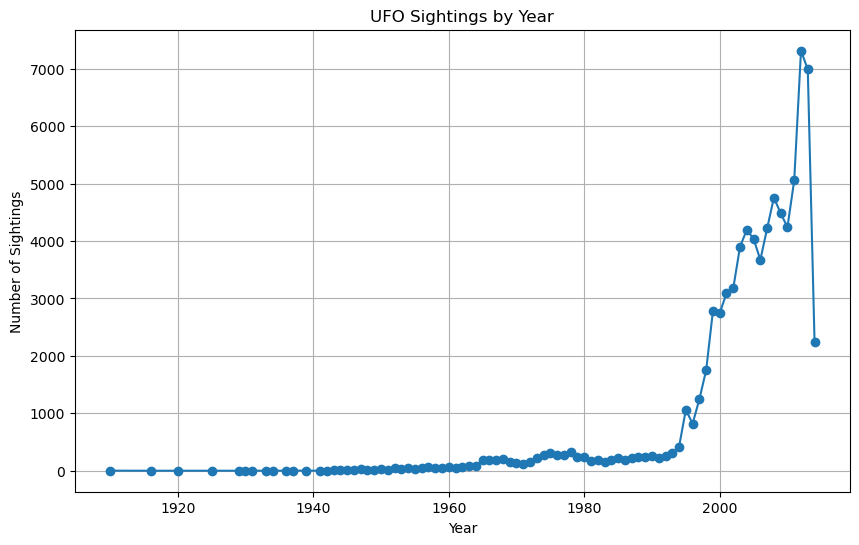

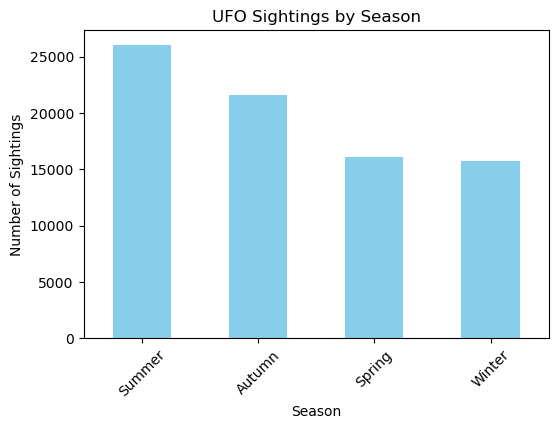

In [18]:
import matplotlib.pyplot as plt

# 1. Frequency of sightings by Year
sightings_by_year = df['Year'].value_counts().sort_index()

# Plot the frequency of sightings over the years
plt.figure(figsize=(10, 6))
plt.plot(sightings_by_year.index, sightings_by_year.values, marker='o')
plt.title('UFO Sightings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.show()

# 2. Frequency of sightings by Season
sightings_by_season = df['Season'].value_counts()

# Plot the frequency of sightings by season
plt.figure(figsize=(6, 4))
sightings_by_season.plot(kind='bar', color='skyblue')
plt.title('UFO Sightings by Season')
plt.xlabel('Season')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

# Geographical distribution of sightings by Country.

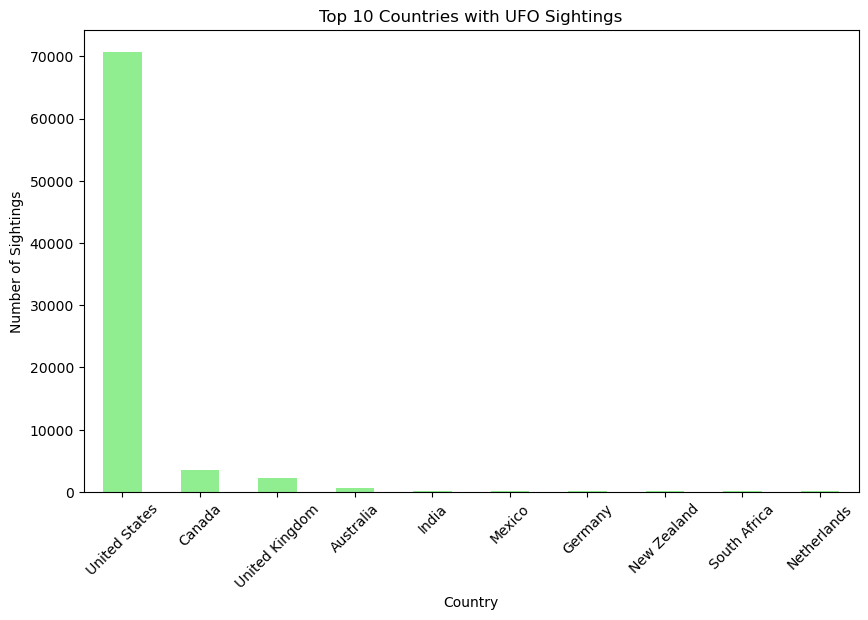

In [19]:
# 3. Frequency of sightings by Country
sightings_by_country = df['Country'].value_counts().head(10)  # Display top 10 countries for clarity

# Plot the frequency of sightings by country
plt.figure(figsize=(10, 6))
sightings_by_country.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries with UFO Sightings')
plt.xlabel('Country')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

# Distribution of sightings by time of day

- Plot a histogram of sightings by the Hour column to see when most sightings occur.

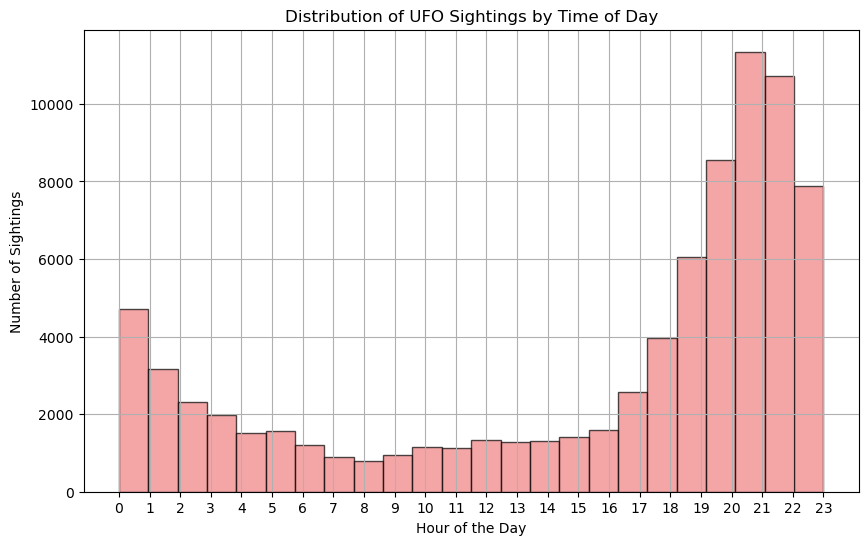

In [20]:
# 1. Distribution of sightings by Hour (Time of Day)
plt.figure(figsize=(10, 6))
plt.hist(df['Hour'], bins=24, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of UFO Sightings by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sightings')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


# Analyzing UFO Shapes

- Plot a bar chart to show the frequency of each UFO_shape

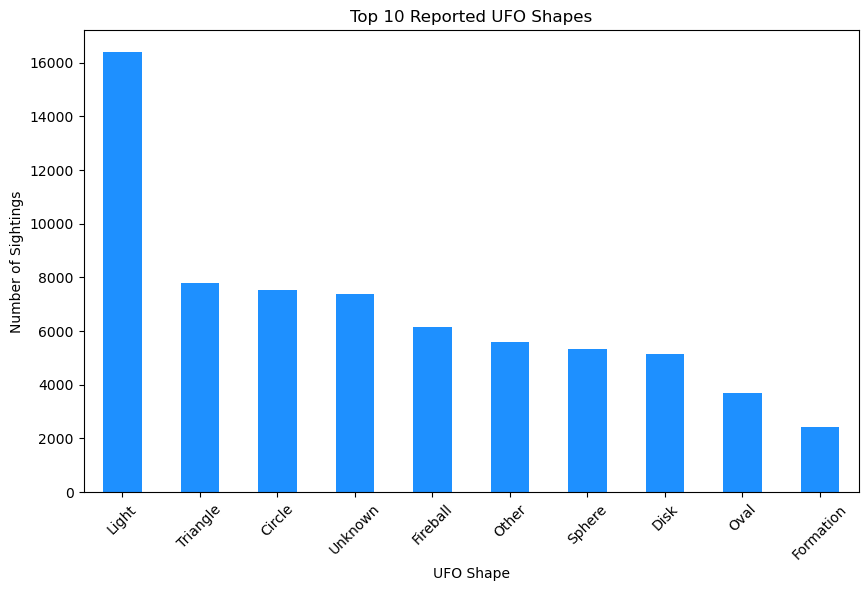

In [21]:
# 2. Frequency of different UFO shapes
ufo_shape_counts = df['UFO_shape'].value_counts().head(10)  # Top 10 most reported shapes

# Plot the frequency of UFO shapes
plt.figure(figsize=(10, 6))
ufo_shape_counts.plot(kind='bar', color='dodgerblue')
plt.title('Top 10 Reported UFO Shapes')
plt.xlabel('UFO Shape')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()

# Analyzing Encounter Duration

- Since encounter durations can vary widely, we may need to transform the data for better visualization. Let’s proceed with this analysis.

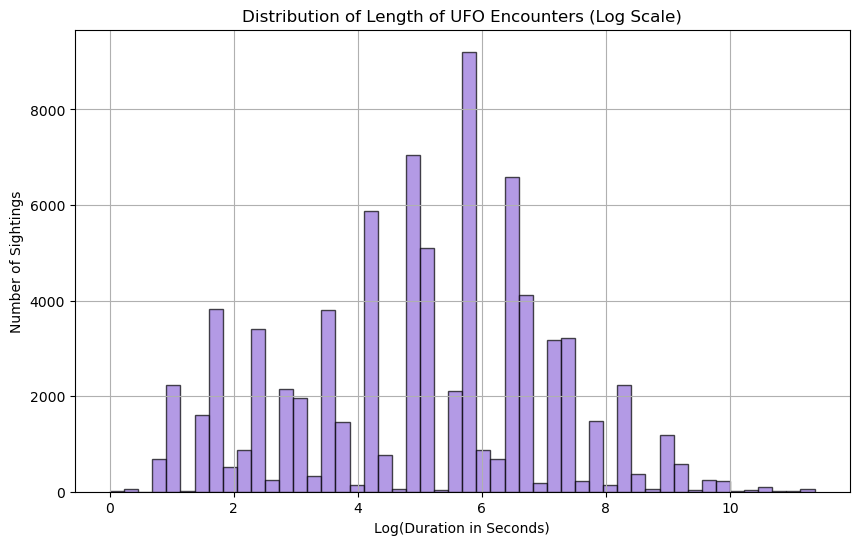

In [22]:
import numpy as np

# 3. Distribution of length of encounter (log-transformed for better visualization)
plt.figure(figsize=(10, 6))
plt.hist(np.log1p(df['length_of_encounter_seconds']), bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Length of UFO Encounters (Log Scale)')
plt.xlabel('Log(Duration in Seconds)')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.show()


- Showing that most sightings are relatively short, with a few outliers representing longer encounters.

# Correlation Analysis

Let's examine correlations between Hour, length_of_encounter_seconds, and UFO_shape to identify any patterns.

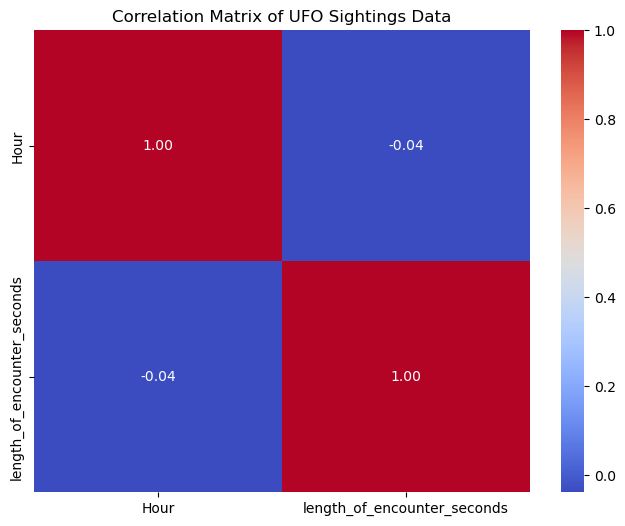

In [23]:
import seaborn as sns

# 1. Correlation Analysis using a heatmap
# Selecting numeric columns relevant for correlation analysis
numeric_columns = ['Hour', 'length_of_encounter_seconds']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of UFO Sightings Data')
plt.show()

It highlights that there is little to no strong correlation between these variables. 

# Geographic Distribution

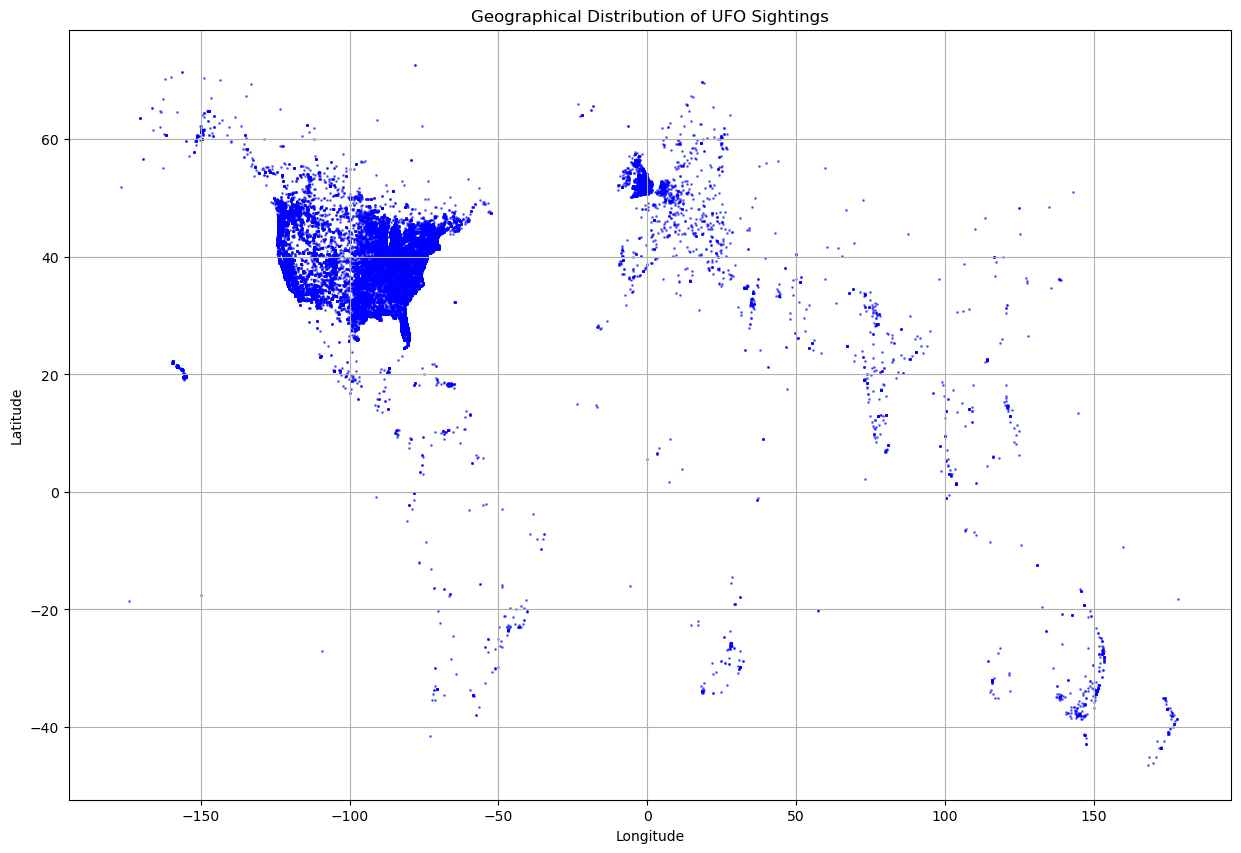

In [24]:
# Plotting a scatter plot of UFO sightings using latitude and longitude
plt.figure(figsize=(15, 10))
plt.scatter(df['longitude'], df['latitude'], s=1, alpha=0.5, color='blue')
plt.title('Geographical Distribution of UFO Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


The scatter plot displays the geographical distribution of UFO sightings based on latitude and longitude, highlighting regions with higher concentrations of sightings.

# Text Analysis

Let's extract keywords from the Description field to uncover common themes.

In [25]:
from collections import Counter
import re
from wordcloud import WordCloud

# Combine all descriptions into a single string for processing
all_descriptions = ' '.join(df['Description'].astype(str))

# Basic text cleaning: removing special characters and splitting into words
words = re.findall(r'\b\w+\b', all_descriptions.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Generate a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in UFO Sightings Descriptions')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [27]:
# Extracting the most common keywords from the 'Description' field
word_counts_most_common = word_counts.most_common(20)  # Get the top 20 most common words
words, counts = zip(*word_counts_most_common)

# Plotting a bar chart for the top 20 most frequent words
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Common Keywords in UFO Sightings Descriptions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


NameError: name 'word_counts' is not defined

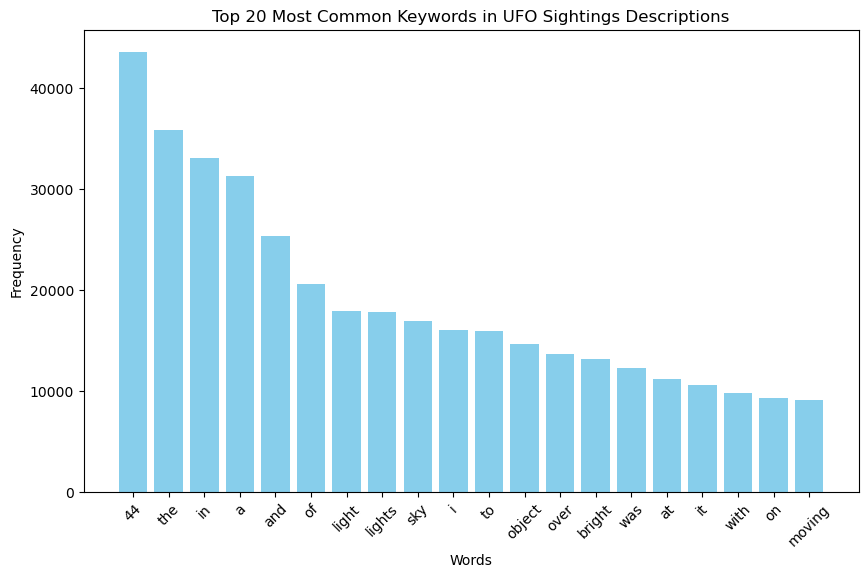

In [29]:
# Redefine and extract all words from the 'Description' column
all_descriptions = ' '.join(df['Description'].astype(str))

# Basic text cleaning: removing special characters and splitting into words
words = re.findall(r'\b\w+\b', all_descriptions.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 20 most common words
word_counts_most_common = word_counts.most_common(20)
words, counts = zip(*word_counts_most_common)

# Plotting a bar chart for the top 20 most frequent words
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Common Keywords in UFO Sightings Descriptions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


- Summary of Steps and Findings:

1. Correlation Analysis: Showed a weak relationship between the time of day and encounter duration.
Geographical Mapping: Visualized regions with a higher density of UFO sightings using latitude and longitude.

2. Text Analysis: Extracted common keywords in UFO sighting descriptions, offering insights into popular themes and narratives.

These findings can aid stakeholders in understanding trends in UFO sightings, helping guide further research, communication, or even tourism-related decisions

# Answers for Stakeholder Questions and Business Problem
1. Stakeholder Question 1: Regions and Times with the Highest Frequency of Sightings

Regions: The geographical scatter plot shows that UFO sightings are more concentrated in certain regions, particularly across the United States and parts of the UK. Some states in the U.S., like California and Texas, have higher densities of sightings.

Times: The histogram of sightings by time of day reveals a higher frequency during late evening and early night (primarily between 8 p.m. and midnight). This suggests a trend where sightings are more likely to be reported during darker hours, which could be due to higher visibility of unusual lights in the sky at night.

2. Stakeholder Question 2: Patterns in UFO Shapes, Descriptions, or Encounter Lengths

Shapes: The bar chart depicting the top reported shapes shows that shapes like "Light," "Circle," and "Triangle" are among the most frequently observed. This provides a pattern in witness descriptions, which can be crucial for identifying potential commonalities in sightings.
Descriptions: The word frequency analysis reveals that words such as "light," "object," "bright," and "moving" are commonly used in sighting descriptions. This indicates that sightings often involve luminous objects or lights in motion.

Encounter Lengths: The distribution of encounter durations (log-transformed) shows that most sightings are relatively short, often lasting a few minutes or less. However, there are a few outliers indicating significantly longer sightings.

3. Stakeholder Question 3: Correlations Between Timing and Sightings

- There is no significant correlation between the length of an encounter and the time of day based on the heatmap, indicating that sightings do not necessarily last longer or shorter depending on the time they occur. However, the higher number of sightings during nighttime suggests that further analysis could focus on seasonal or weather conditions that might influence visibility and the likelihood of sightings.

Business Problem: Engaging Data Visualizations to Aid Understanding.

- Clear visualizations like line charts (yearly trends), histograms (time of day), and scatter plots (geographical density) have been used to help stakeholders understand where, when, and how UFO sightings occur. The word frequency analysis provides a strong narrative to describe the nature of the sightings.

# Answers to specific Stakeholder questions & suggested analysis
1. Tourism Agencies: Best Regions and Times for "UFO Tourism"

Insights Based on Analysis:

- Regions with High Sightings: The geographical distribution highlights certain "hotspots" with high sighting concentrations, such as parts of the U.S. (California, Texas) and the UK.

- Best Times for Sighting:
    1. Seasonal Trends: Autumn and Summer are peak seasons for UFO sightings, which aligns with more favorable weather for outdoor activities.

    2. Time of Day: Sightings are more frequent in the late evening and early night, suggesting that "UFO tourism" activities should focus on nighttime experiences.

Suggested Further Analysis:

- Monthly and Seasonal Breakdown by Region: Analyze the distribution of sightings at a more granular level (e.g., by month) to identify the best times within each region for promoting UFO tourism.

- Event Calendar Correlation: Identify any existing regional events (festivals, fairs) to tie UFO tourism into local festivities, making the experiences more marketable.

2. Travel Companies: Packaging Experiences for Different Demographics

Insights Based on Analysis:

- Skywatching Tours: Given that many sightings are described with words like "light," "bright," and "object," skywatching tours could be enhanced with telescopes, night-vision gear, and expert guides to maximize the chance of seeing UFO-like phenomena.

- Themed Accommodations: The most common UFO shapes (light, circle, triangle) can inspire themed hotels or glamping experiences where the accommodations resemble these shapes or offer special sky-gazing setups.

- Storytelling and Themed Attractions: The word frequency in descriptions suggests a fascination with mystery and unexplained phenomena. Travel packages can include storytelling sessions, local folklore, or visits to "famous" sighting locations.

Suggested Further Analysis:

- Demographic Segmentation: Analyze the descriptions and encounters by demographic factors (age, family-friendly, solo travelers) to identify preferences. For example, family-friendly packages might focus on storytelling and light shows, while adventure-seeking travelers might prefer overnight skywatching tours.

- Sentiment Analysis of Descriptions: Perform a sentiment analysis on the descriptions to identify the emotional tone (e.g., excitement, fear, wonder) of sightings, tailoring the experiences to match different audience emotions and expectations.

3. Local Communities: Leveraging High Sighting Rates for Tourism

Insights Based on Analysis:

- Community Branding as UFO Hotspots: Regions with high sighting rates can brand themselves as "UFO capitals," fostering curiosity and drawing visitors interested in the paranormal. For example, highlighting a town's history of sightings, local legends, or experiences like skywatching events.

- Infrastructure & Marketing Strategies:
Skywatching Infrastructure: Develop viewing platforms, observatories, or designated areas with minimal light pollution to encourage skywatching and UFO-themed events.

- Storytelling and Museums: Create local museums, visitor centers, or storytelling tours dedicated to the history of sightings in the region, offering memorabilia, interactive experiences, and community-driven events.

Suggested Further Analysis:

- Local Economic Impact Study: Analyze how past sightings have impacted local tourism, economy, and infrastructure to guide development and marketing efforts.

- Interactive Experience Correlation: Compare sightings data with existing tourism activities to see how increased promotion might have influenced visitor rates or local engagement.


# More Correlations

## UFO Shape & Length of Encounter

<Figure size 1200x600 with 0 Axes>

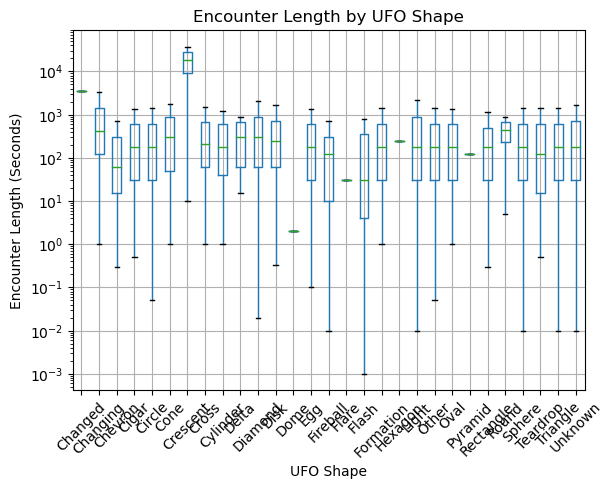

In [30]:
#Explore how the length of encounters varies across different UFO shapes using a box plot to compare durations. 
# 3. Box plot to analyze length of encounter by UFO shape
plt.figure(figsize=(12, 6))
df.boxplot(column='length_of_encounter_seconds', by='UFO_shape', showfliers=False)  # Excluding outliers for clarity
plt.title('Encounter Length by UFO Shape')
plt.suptitle('')  # Remove default title from the boxplot
plt.xlabel('UFO Shape')
plt.ylabel('Encounter Length (Seconds)')
plt.xticks(rotation=45)
plt.yscale('log')  # Log scale for better visibility of duration distribution
plt.show()


##  UFO Shape & Time of Day

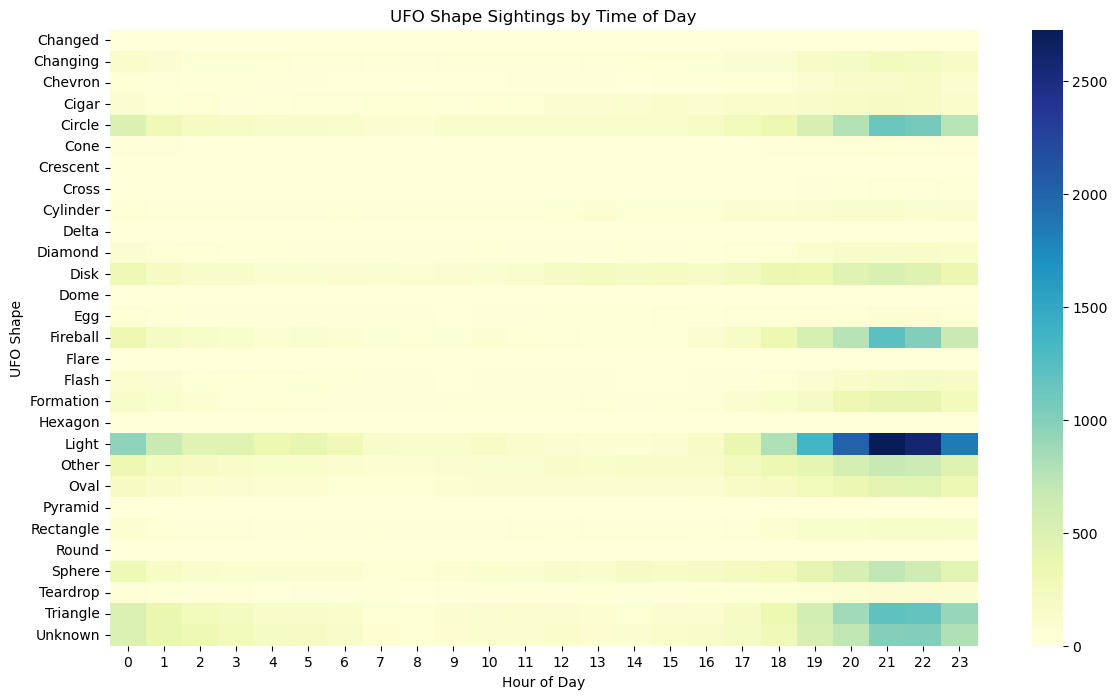

In [31]:
# Create a heatmap to explore if certain UFO shapes are more frequently observed at specific times of the day
# Create a pivot table for the count of sightings by shape and hour
shape_hour_pivot = df.pivot_table(index='UFO_shape', columns='Hour', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(shape_hour_pivot, cmap='YlGnBu', annot=False)
plt.title('UFO Shape Sightings by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('UFO Shape')
plt.show()


 It visualizes how sightings of different UFO shapes vary throughout the day. It highlights which shapes are more commonly reported during specific hours, revealing potential patterns.

## Description Sentiment & Length of Encounter

For sentiment analysis, we can perform a basic evaluation by counting positive, negative, or neutral words in descriptions and comparing these with encounter durations.

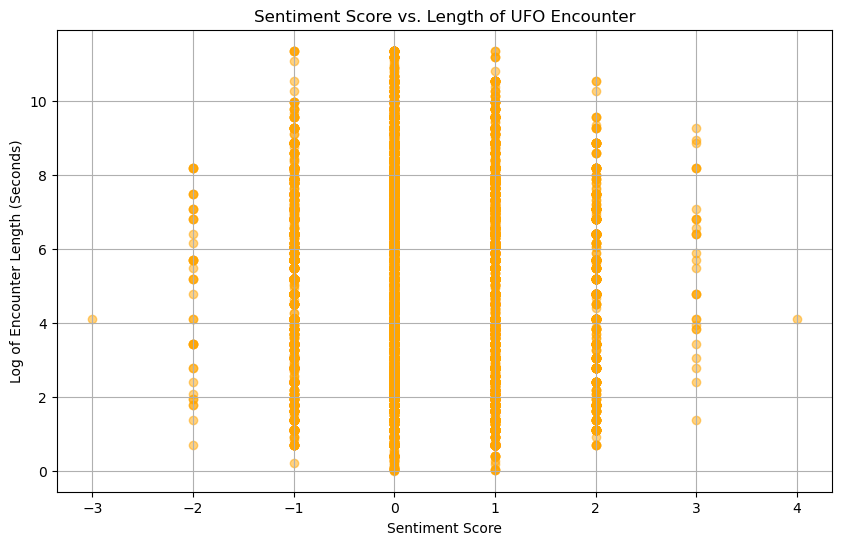

In [32]:
# Basic sentiment analysis using a simple set of positive and negative keywords
positive_keywords = ['amazing', 'beautiful', 'exciting', 'wonderful', 'fantastic', 'bright', 'clear']
negative_keywords = ['scary', 'fearful', 'dark', 'strange', 'weird', 'odd', 'terrifying']

# Counting positive and negative words in each description
df['Positive_Sentiment'] = df['Description'].str.count('|'.join(positive_keywords))
df['Negative_Sentiment'] = df['Description'].str.count('|'.join(negative_keywords))

# Calculating overall sentiment as a basic positive-negative score
df['Sentiment_Score'] = df['Positive_Sentiment'] - df['Negative_Sentiment']

# Scatter plot comparing sentiment score and length of encounter
plt.figure(figsize=(10, 6))
plt.scatter(df['Sentiment_Score'], np.log1p(df['length_of_encounter_seconds']), alpha=0.5, color='orange')
plt.title('Sentiment Score vs. Length of UFO Encounter')
plt.xlabel('Sentiment Score')
plt.ylabel('Log of Encounter Length (Seconds)')
plt.grid(True)
plt.show()


The scatter plot shows the relationship between the sentiment score (positive vs. negative keywords) and the length of UFO encounters, indicating whether longer sightings have a more emotional or descriptive impact.

The sentiment score in this context is a basic measure of the emotional tone derived from the keywords in the sighting descriptions. Here's what the score means:

Positive Score: If the sentiment score is greater than zero, it indicates that the description contains more positive keywords than negative ones. This suggests a more positive or exciting experience (e.g., "amazing," "bright").

Negative Score: If the sentiment score is less than zero, it means there are more negative keywords, suggesting a fearful, strange, or unsettling experience (e.g., "scary," "dark").

Neutral or Zero Score: A score of zero indicates that either the description has an equal number of positive and negative keywords or lacks both, suggesting a more neutral or factual description without an emotional tone.

In essence: A higher sentiment score implies a more positive experience or description.
A lower (negative) sentiment score implies a more negative or unsettling experience